# Predicting premier league outcomes 

## Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import statsmodels.formula.api as smf

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

## ETL

In [10]:
url = 'https://github.com/cmannnn/predicting_premier_league_games/blob/main/datasets/main17-23.csv?raw=true'
df = pd.read_csv(url)
df.head()

Date   Time            Comp        Round  Day Venue Result   GF   GA  \
0  2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2.0  0.0   
1  2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4.0  2.0   
2  2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3.0  0.0   
3  2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2.0  1.0   
4  2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2.0  1.0   

         Opponent  ...  Match Report  Notes    Sh  SoT  Dist   FK   PK PKatt  \
0  Crystal Palace  ...  Match Report    NaN  10.0  2.0  14.6  1.0  0.0   0.0   
1  Leicester City  ...  Match Report    NaN  19.0  7.0  13.0  0.0  0.0   0.0   
2     Bournemouth  ...  Match Report    NaN  14.0  6.0  14.8  0.0  0.0   0.0   
3          Fulham  ...  Match Report    NaN  22.0  8.0  15.5  1.0  0.0   0.0   
4     Aston Villa  ...  Match Report    NaN  22.0  8.0  16.3  1.0  0.0   0.0   

   Season     Team  
0    2022  Arsenal  
1    2022  Arsenal  
2    2022  Arsenal  
3    2022  Arsenal  
4    2022  Arsenal  

[5 rows x 27 columns]

In [11]:
df.drop(columns=['Notes', 'Match Report', 'Comp'], inplace = True)
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
# df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M', errors='coerce')
# df['Time'] = df['Time'].dt.strftime("%H:%M")

In [13]:
df['Attendance'] = df['Attendance'].fillna(df['Attendance'].mean())
df['Dist'] = df['Dist'].fillna(df['Dist'].mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4092 non-null   datetime64[ns]
 1   Time        4092 non-null   object        
 2   Round       4092 non-null   object        
 3   Day         4092 non-null   object        
 4   Venue       4092 non-null   object        
 5   Result      4092 non-null   object        
 6   GF          4092 non-null   float64       
 7   GA          4092 non-null   float64       
 8   Opponent    4092 non-null   object        
 9   xG          4092 non-null   float64       
 10  xGA         4092 non-null   float64       
 11  Poss        4092 non-null   float64       
 12  Attendance  4092 non-null   float64       
 13  Captain     4092 non-null   object        
 14  Formation   4092 non-null   object        
 15  Referee     4092 non-null   object        
 16  Sh          4092 non-nul

In [15]:
df.columns

Index(['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Referee', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [16]:
df.describe()

Date           GF           GA           xG  \
count                           4092  4092.000000  4092.000000  4092.000000   
mean   2020-03-20 11:50:08.797654272     1.377810     1.377810     1.346163   
min              2017-08-11 00:00:00     0.000000     0.000000     0.000000   
25%              2018-12-01 00:00:00     0.000000     0.000000     0.700000   
50%              2020-02-22 00:00:00     1.000000     1.000000     1.200000   
75%              2021-08-21 00:00:00     2.000000     2.000000     1.800000   
max              2022-11-13 00:00:00     9.000000     9.000000     5.900000   
std                              NaN     1.277631     1.277631     0.796551   

               xGA         Poss    Attendance           Sh          SoT  \
count  4092.000000  4092.000000   4092.000000  4092.000000  4092.000000   
mean      1.346163    50.001222  38233.239103    12.317693     4.102884   
min       0.000000    18.000000   2000.000000     0.000000     0.000000   
25%       0.700000    41.000000  29296.000000     8.000000     2.000000   
50%       1.200000    50.000000  38233.239103    12.000000     4.000000   
75%       1.800000    59.000000  51237.000000    16.000000     6.000000   
max       5.900000    82.000000  83222.000000    36.000000    15.000000   
std       0.796551    12.726702  15091.774109     5.427259     2.437269   

              Dist           FK           PK        PKatt       Season  
count  4092.000000  4092.000000  4092.000000  4092.000000  4092.000000  
mean     17.675373     0.459922     0.104839     0.132698  2019.214076  
min       5.300000     0.000000     0.000000     0.000000  2017.000000  
25%      15.700000     0.000000     0.000000     0.000000  2018.000000  
50%      17.600000     0.000000     0.000000     0.000000  2019.000000  
75%      19.500000     1.000000     0.000000     0.000000  2021.000000  
max      35.000000     6.000000     3.000000     3.000000  2022.000000  
std       3.038063     0.679056     0.322703     0.361610     1.566615

In [17]:
df.iloc[1]

Date          2022-08-13 00:00:00
Time                        15:00
Round                 Matchweek 2
Day                           Sat
Venue                        Home
Result                          W
GF                            4.0
GA                            2.0
Opponent           Leicester City
xG                            2.7
xGA                           0.5
Poss                         50.0
Attendance                60033.0
Captain           Martin Ødegaard
Formation                   4-3-3
Referee            Darren England
Sh                           19.0
SoT                           7.0
Dist                         13.0
FK                            0.0
PK                            0.0
PKatt                         0.0
Season                       2022
Team                      Arsenal
Name: 1, dtype: object

In [18]:
dfc = df.copy()

In [19]:
dfc.head()

Date   Time        Round  Day Venue Result   GF   GA        Opponent  \
0 2022-08-05  20:00  Matchweek 1  Fri  Away      W  2.0  0.0  Crystal Palace   
1 2022-08-13  15:00  Matchweek 2  Sat  Home      W  4.0  2.0  Leicester City   
2 2022-08-20  17:30  Matchweek 3  Sat  Away      W  3.0  0.0     Bournemouth   
3 2022-08-27  17:30  Matchweek 4  Sat  Home      W  2.0  1.0          Fulham   
4 2022-08-31  19:30  Matchweek 5  Wed  Home      W  2.0  1.0     Aston Villa   

    xG  ...  Formation         Referee    Sh  SoT  Dist   FK   PK  PKatt  \
0  1.0  ...      4-3-3  Anthony Taylor  10.0  2.0  14.6  1.0  0.0    0.0   
1  2.7  ...      4-3-3  Darren England  19.0  7.0  13.0  0.0  0.0    0.0   
2  1.3  ...      4-3-3    Craig Pawson  14.0  6.0  14.8  0.0  0.0    0.0   
3  2.6  ...      4-3-3  Jarred Gillett  22.0  8.0  15.5  1.0  0.0    0.0   
4  2.4  ...      4-3-3    Robert Jones  22.0  8.0  16.3  1.0  0.0    0.0   

   Season     Team  
0    2022  Arsenal  
1    2022  Arsenal  
2    2022  Arsenal  
3    2022  Arsenal  
4    2022  Arsenal  

[5 rows x 24 columns]

In [20]:
le = LabelEncoder()
object_columns = dfc.select_dtypes(include = 'object').columns
for col in object_columns:
    ev = pd.Series(le.fit_transform(dfc[col]))
    new_cols = [col + '_encoded_' + str(val) for val in le.classes_]

    # can turn this on and off to get label encded col names
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)

    encoded_df = pd.DataFrame(ev, columns=[col + '_encoded'])

    dfc = pd.concat([dfc, encoded_df], axis = 1)
    dfc.drop(columns = [col], inplace = True)

{'12:00': 0, '12:30': 1, '13:30': 2, '14:00': 3, '14:05': 4, '14:15': 5, '15:00': 6, '16:00': 7, '16:15': 8, '16:30': 9, '17:15': 10, '17:30': 11, '17:45': 12, '18:00': 13, '19:00': 14, '19:15': 15, '19:30': 16, '19:45': 17, '20:00': 18, '20:15': 19, '20:30': 20}
{'Matchweek 1': 0, 'Matchweek 10': 1, 'Matchweek 11': 2, 'Matchweek 12': 3, 'Matchweek 13': 4, 'Matchweek 14': 5, 'Matchweek 15': 6, 'Matchweek 16': 7, 'Matchweek 17': 8, 'Matchweek 18': 9, 'Matchweek 19': 10, 'Matchweek 2': 11, 'Matchweek 20': 12, 'Matchweek 21': 13, 'Matchweek 22': 14, 'Matchweek 23': 15, 'Matchweek 24': 16, 'Matchweek 25': 17, 'Matchweek 26': 18, 'Matchweek 27': 19, 'Matchweek 28': 20, 'Matchweek 29': 21, 'Matchweek 3': 22, 'Matchweek 30': 23, 'Matchweek 31': 24, 'Matchweek 32': 25, 'Matchweek 33': 26, 'Matchweek 34': 27, 'Matchweek 35': 28, 'Matchweek 36': 29, 'Matchweek 37': 30, 'Matchweek 38': 31, 'Matchweek 4': 32, 'Matchweek 5': 33, 'Matchweek 6': 34, 'Matchweek 7': 35, 'Matchweek 8': 36, 'Matchweek 9'

## Visualizations

<Axes: >

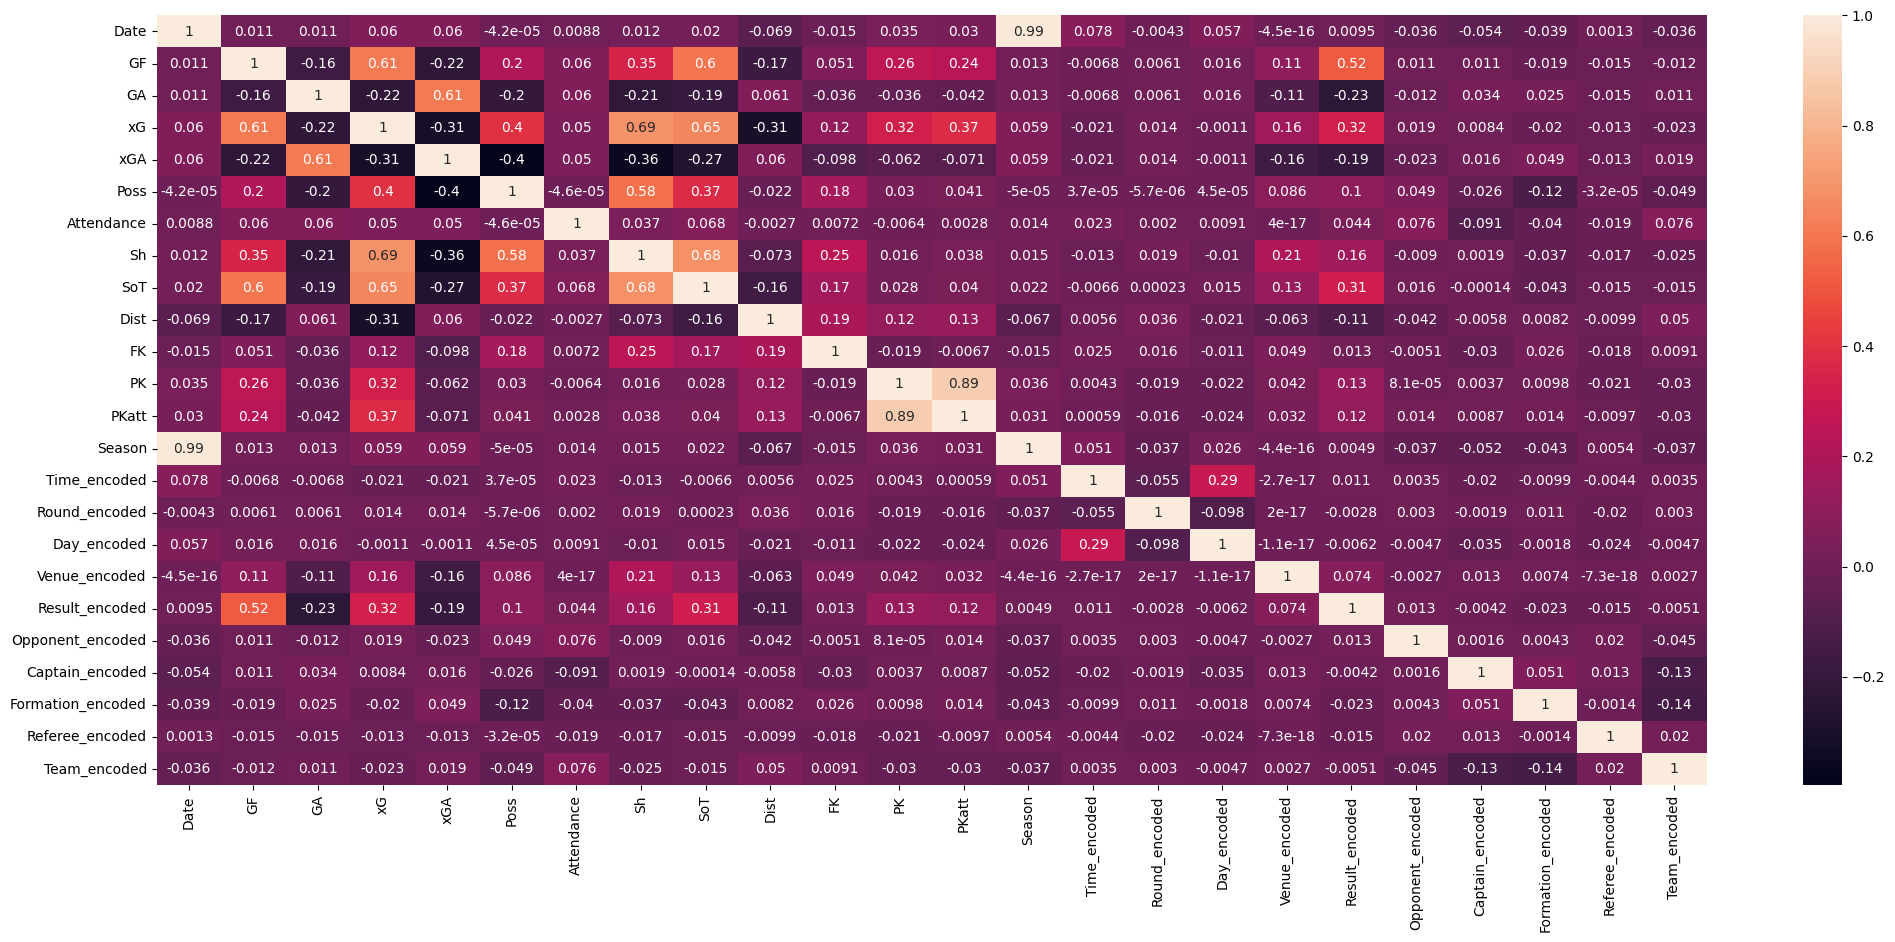

In [21]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(dfc.corr(), annot = True)

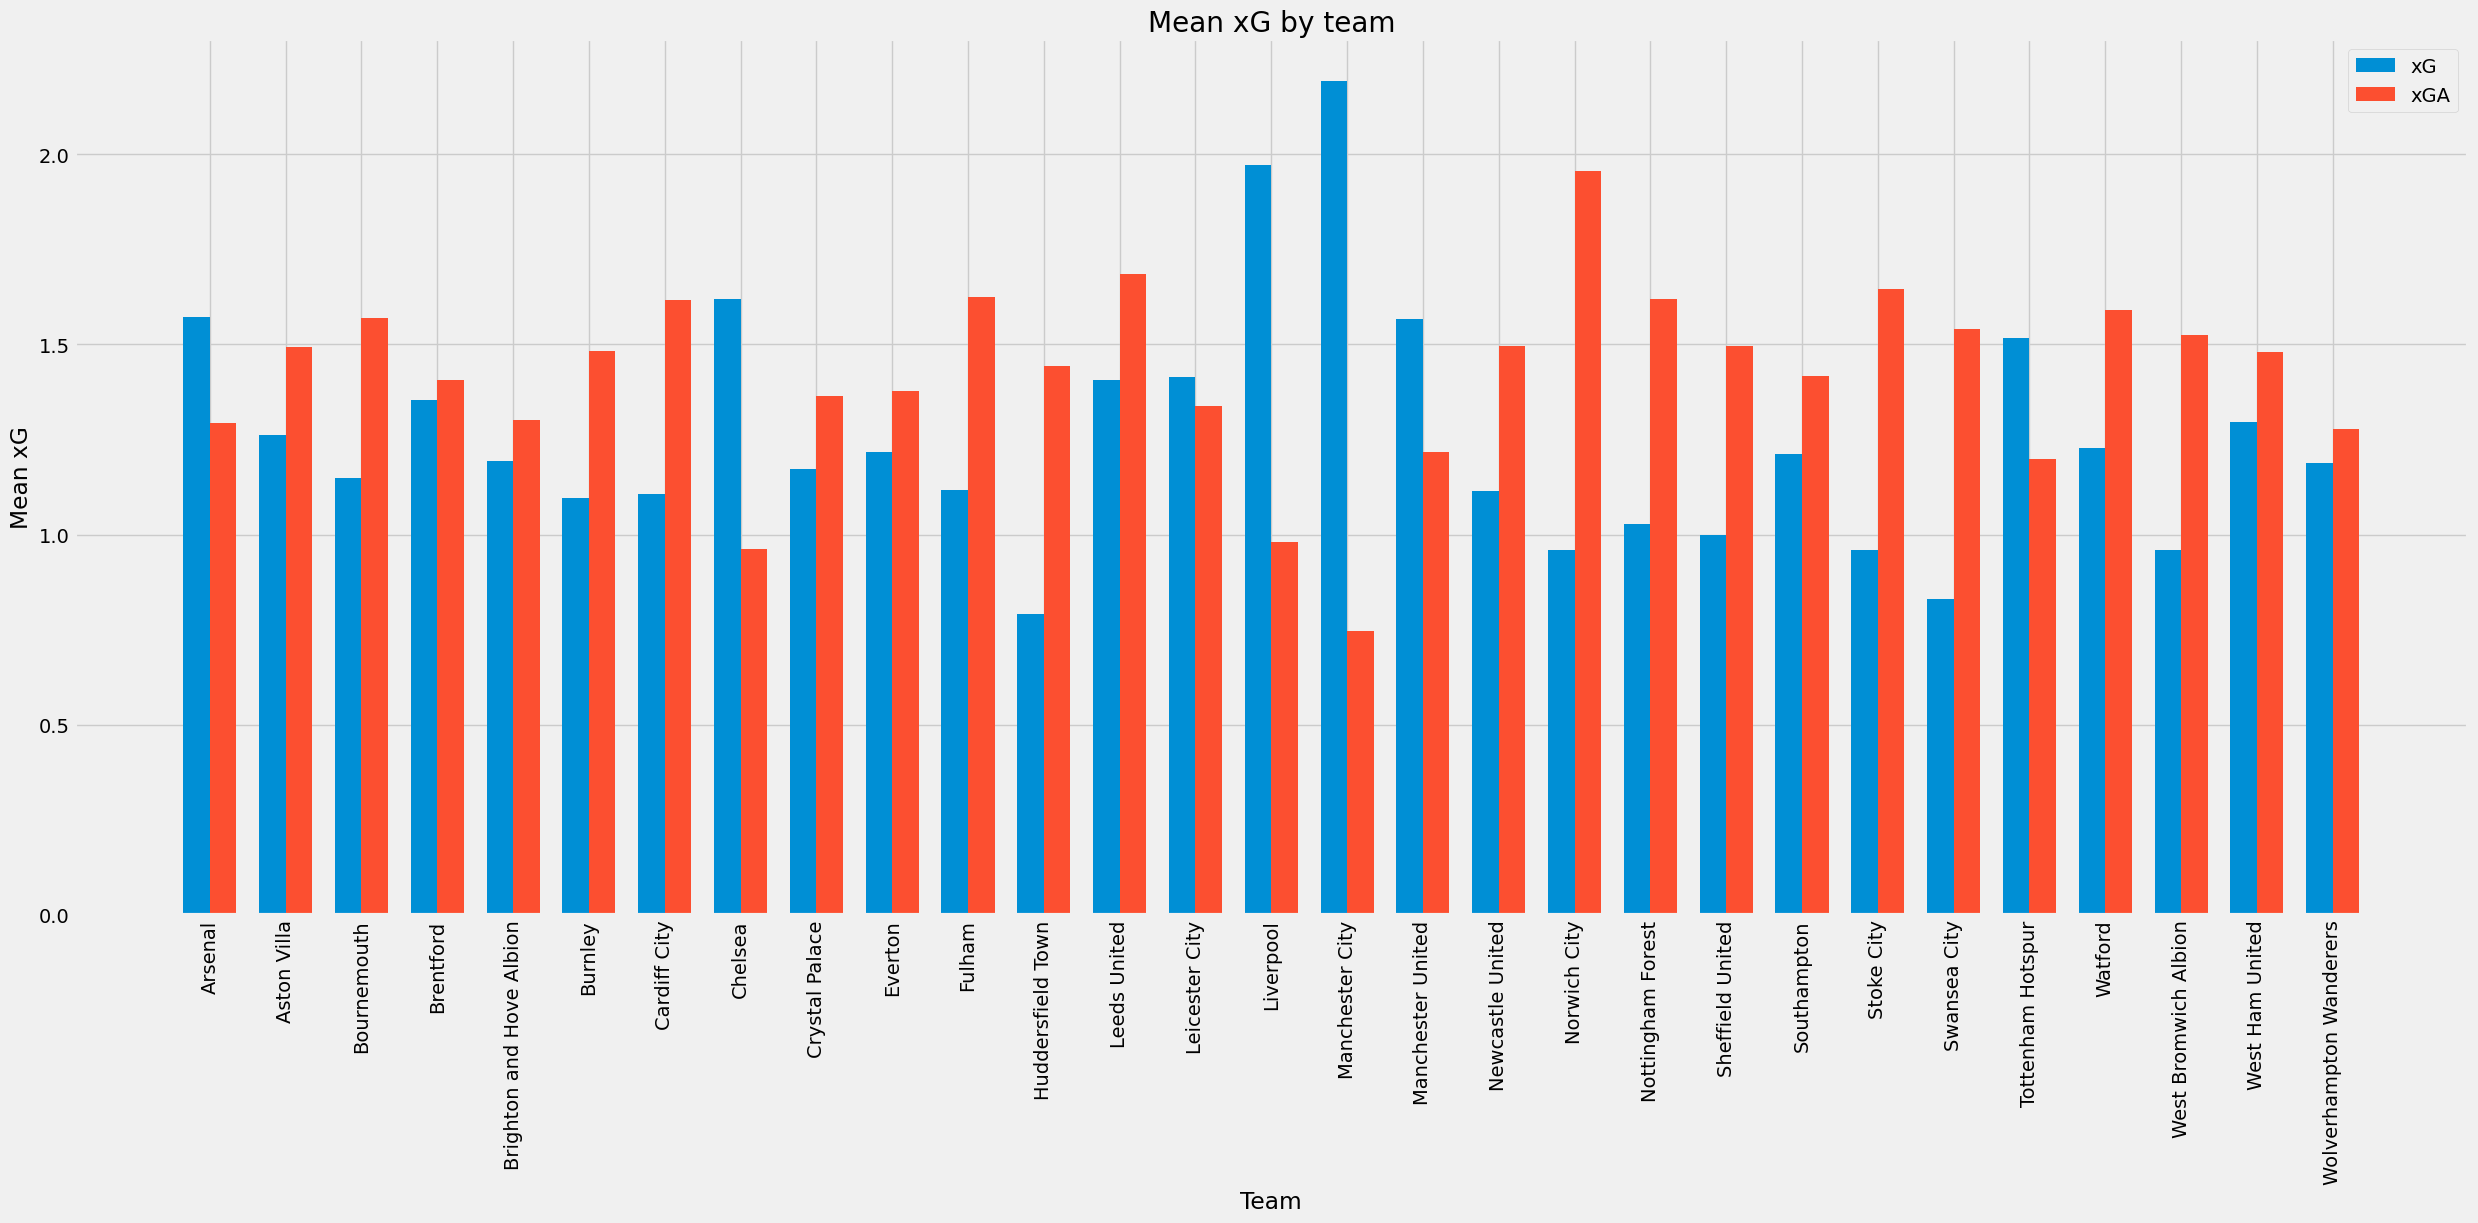

In [22]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

width = 0.35

xg = df['xG'].groupby(df['Team']).mean()
xga = df['xGA'].groupby(df['Team']).mean()

team_names = xg.index
ind = np.arange(len(team_names))

plt.bar(ind, xg, width, label = 'xG')
plt.bar(ind + width, xga, width, label = 'xGA')

plt.title('Mean xG by team')
plt.xlabel('Team')
plt.ylabel('Mean xG')
plt.tight_layout()
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(team_names, rotation = 90)

plt.legend(loc = 'best')
plt.show()

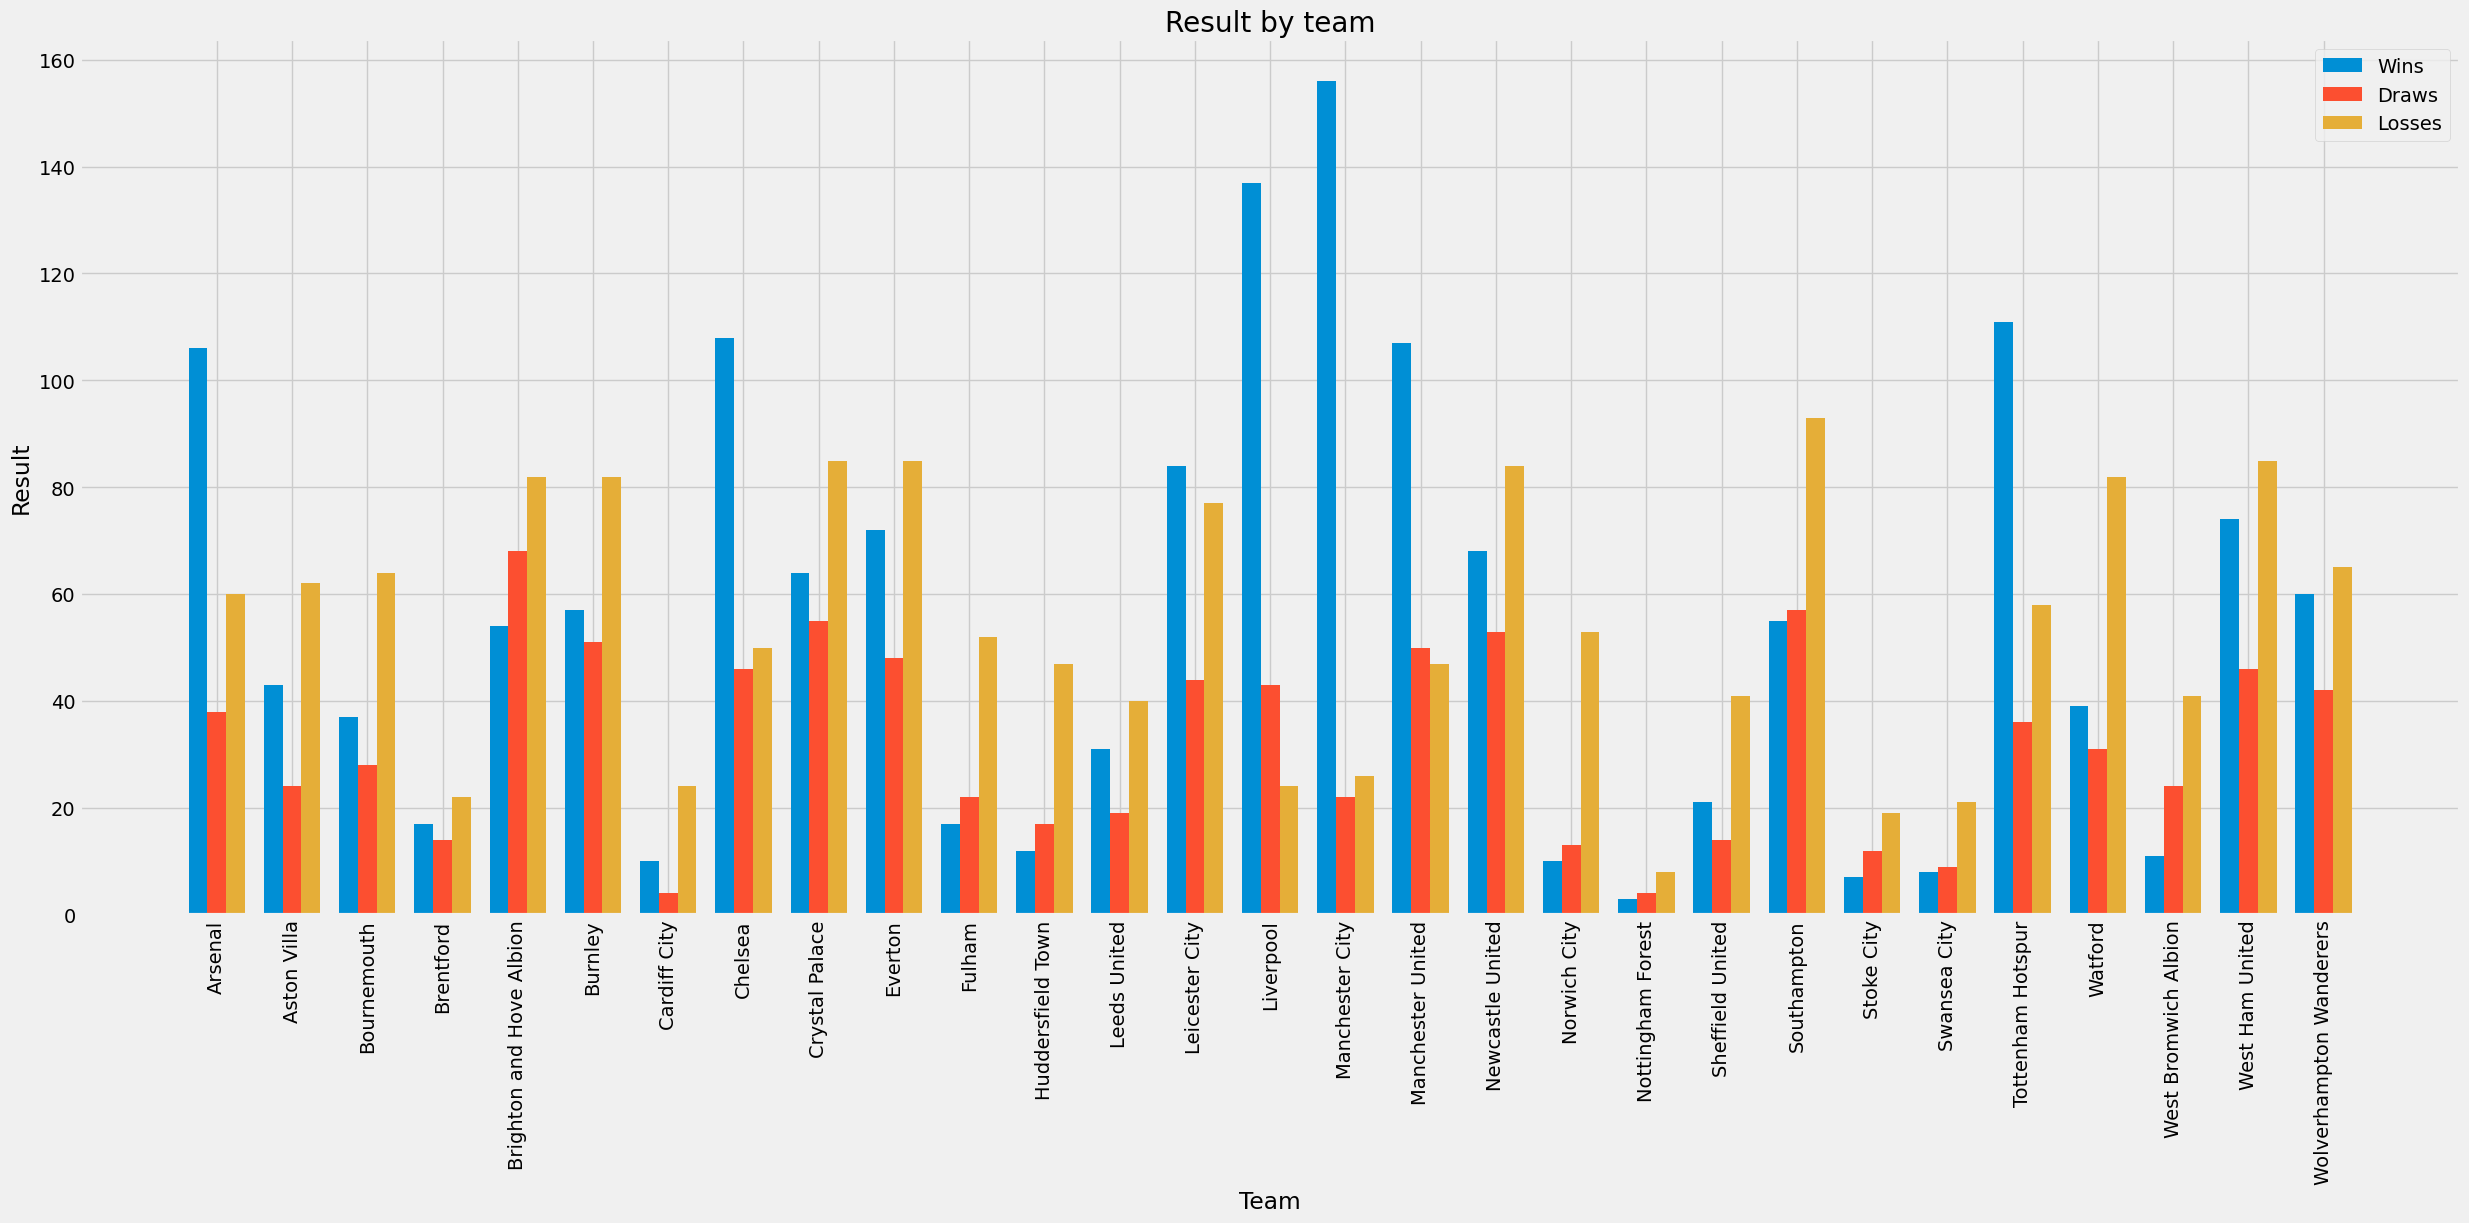

In [23]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

width = 0.25

wins = df[df['Result'] == 'W'].groupby('Team').size()
draws = df[df['Result'] == 'D'].groupby('Team').size()
losses = df[df['Result'] == 'L'].groupby('Team').size()

team_names = xg.index
ind = np.arange(len(team_names))

plt.bar(ind, wins, width, label = 'Wins')
plt.bar(ind + width, draws, width,  label = 'Draws')
plt.bar(ind + (width * 2), losses, width, label = 'Losses')

plt.title('Result by team')
plt.xlabel('Team')
plt.ylabel('Result')
plt.tight_layout()
ax.set_xticks(ind + width)
ax.set_xticklabels(team_names, rotation = 90)

plt.legend(loc = 'best')
plt.show()

/var/folders/lr/994tkpld58q9sbf0jsds90h80000gn/T/ipykernel_97117/3197442336.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (avg_poss[i], avg_xg[i]), xytext = (5,5), textcoords = 'offset points')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


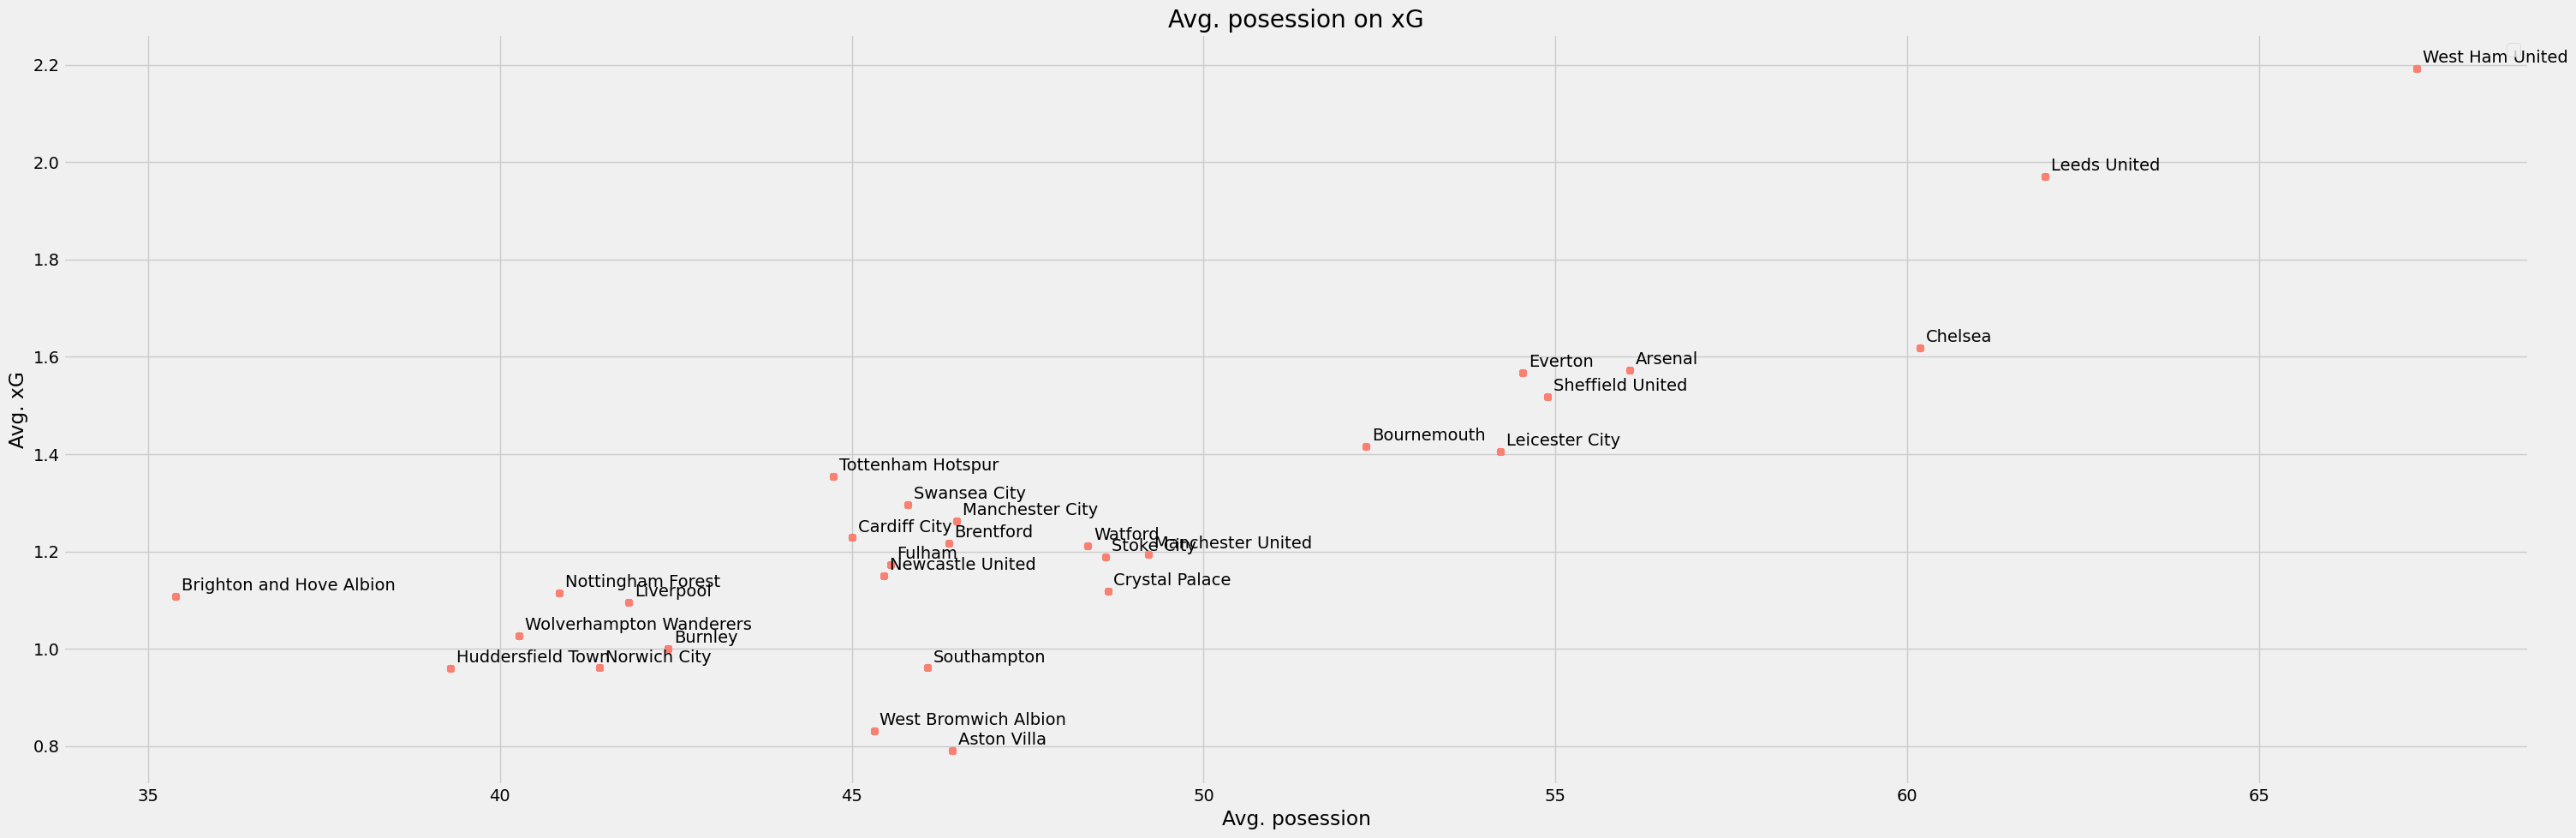

In [24]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (30, 10))

avg_poss  = df['Poss'].groupby(df['Team']).mean()
avg_xg = df['xG'].groupby(df['Team']).mean()
teams = df['Team'].unique()

plt.title('Avg. posession on xG')
plt.xlabel('Avg. posession')
plt.ylabel('Avg. xG')
plt.tight_layout()

for i, txt in enumerate(teams):
    ax.annotate(txt, (avg_poss[i], avg_xg[i]), xytext = (5,5), textcoords = 'offset points')
    plt.scatter(avg_poss, avg_xg, color = 'salmon')

plt.legend(loc = 'best')
plt.show()

In [25]:
df['xG'].groupby(df['Team']).mean()

Team
Arsenal                     1.572549
Aston Villa                 1.262016
Bournemouth                 1.149612
Brentford                   1.354717
Brighton and Hove Albion    1.194608
Burnley                     1.095263
Cardiff City                1.107895
Chelsea                     1.619118
Crystal Palace              1.172549
Everton                     1.217561
Fulham                      1.117582
Huddersfield Town           0.790789
Leeds United                1.405556
Leicester City              1.415610
Liverpool                   1.971569
Manchester City             2.192647
Manchester United           1.566667
Newcastle United            1.114146
Norwich City                0.960526
Nottingham Forest           1.026667
Sheffield United            1.000000
Southampton                 1.212195
Stoke City                  0.960526
Swansea City                0.831579
Tottenham Hotspur           1.518049
Watford                     1.228289
West Bromwich Albion        0.959

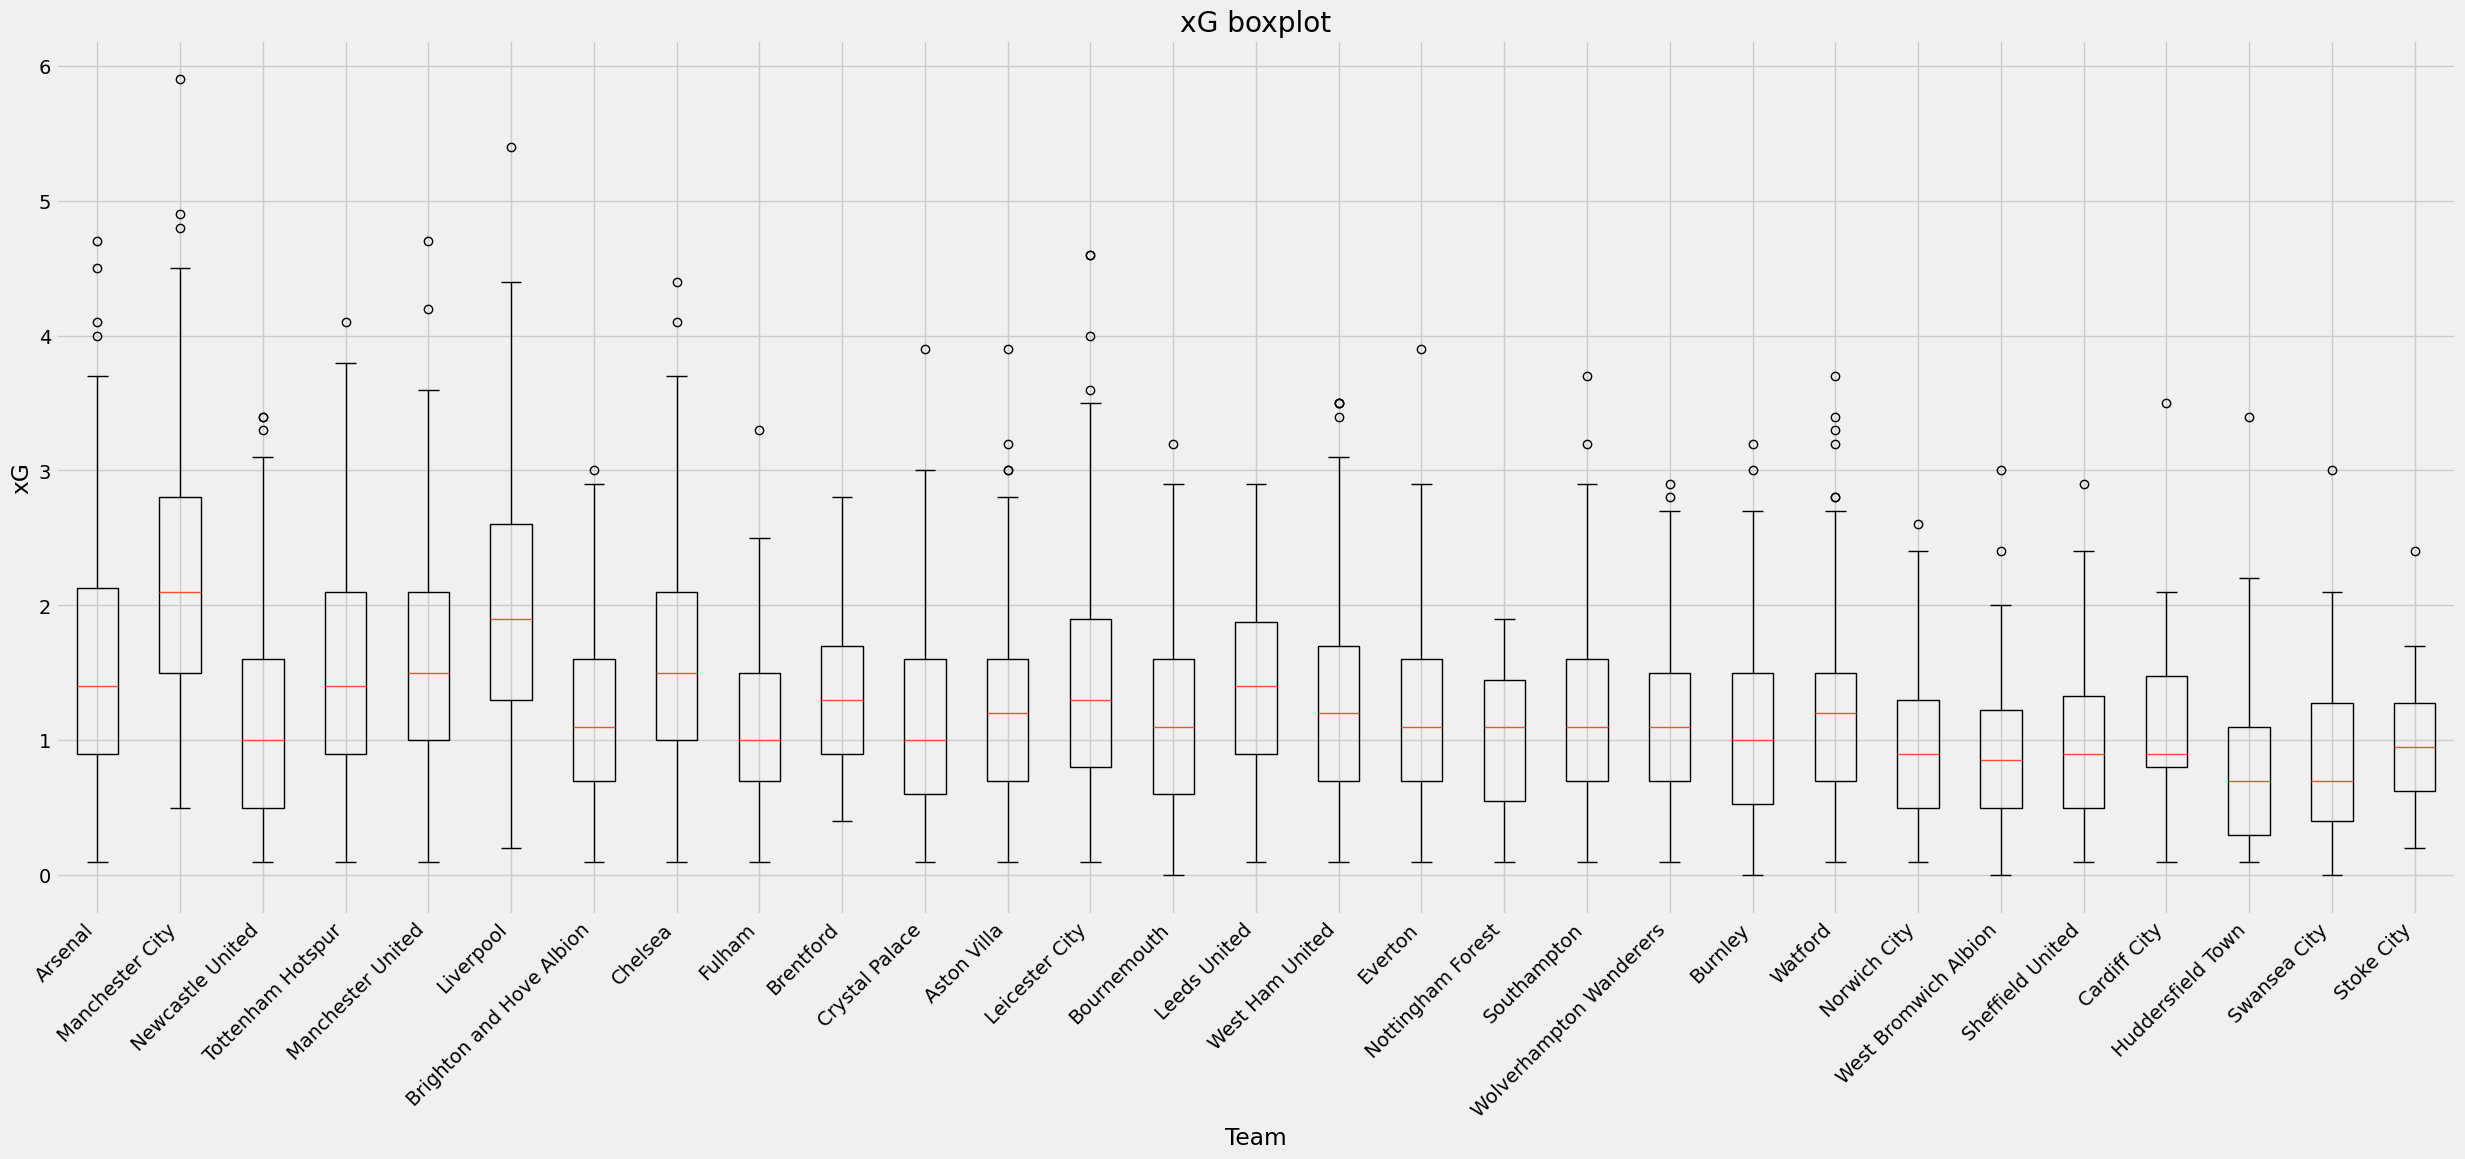

In [26]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

avg_xg = df.groupby('Team')['xG'].apply(list)

data_to_plot = [avg_xg[team] for team in df['Team'].unique()]


plt.boxplot(data_to_plot, labels = df['Team'].unique())

plt.title('xG boxplot')
plt.xlabel('Team')
plt.ylabel('xG')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

## Multiple linear regression

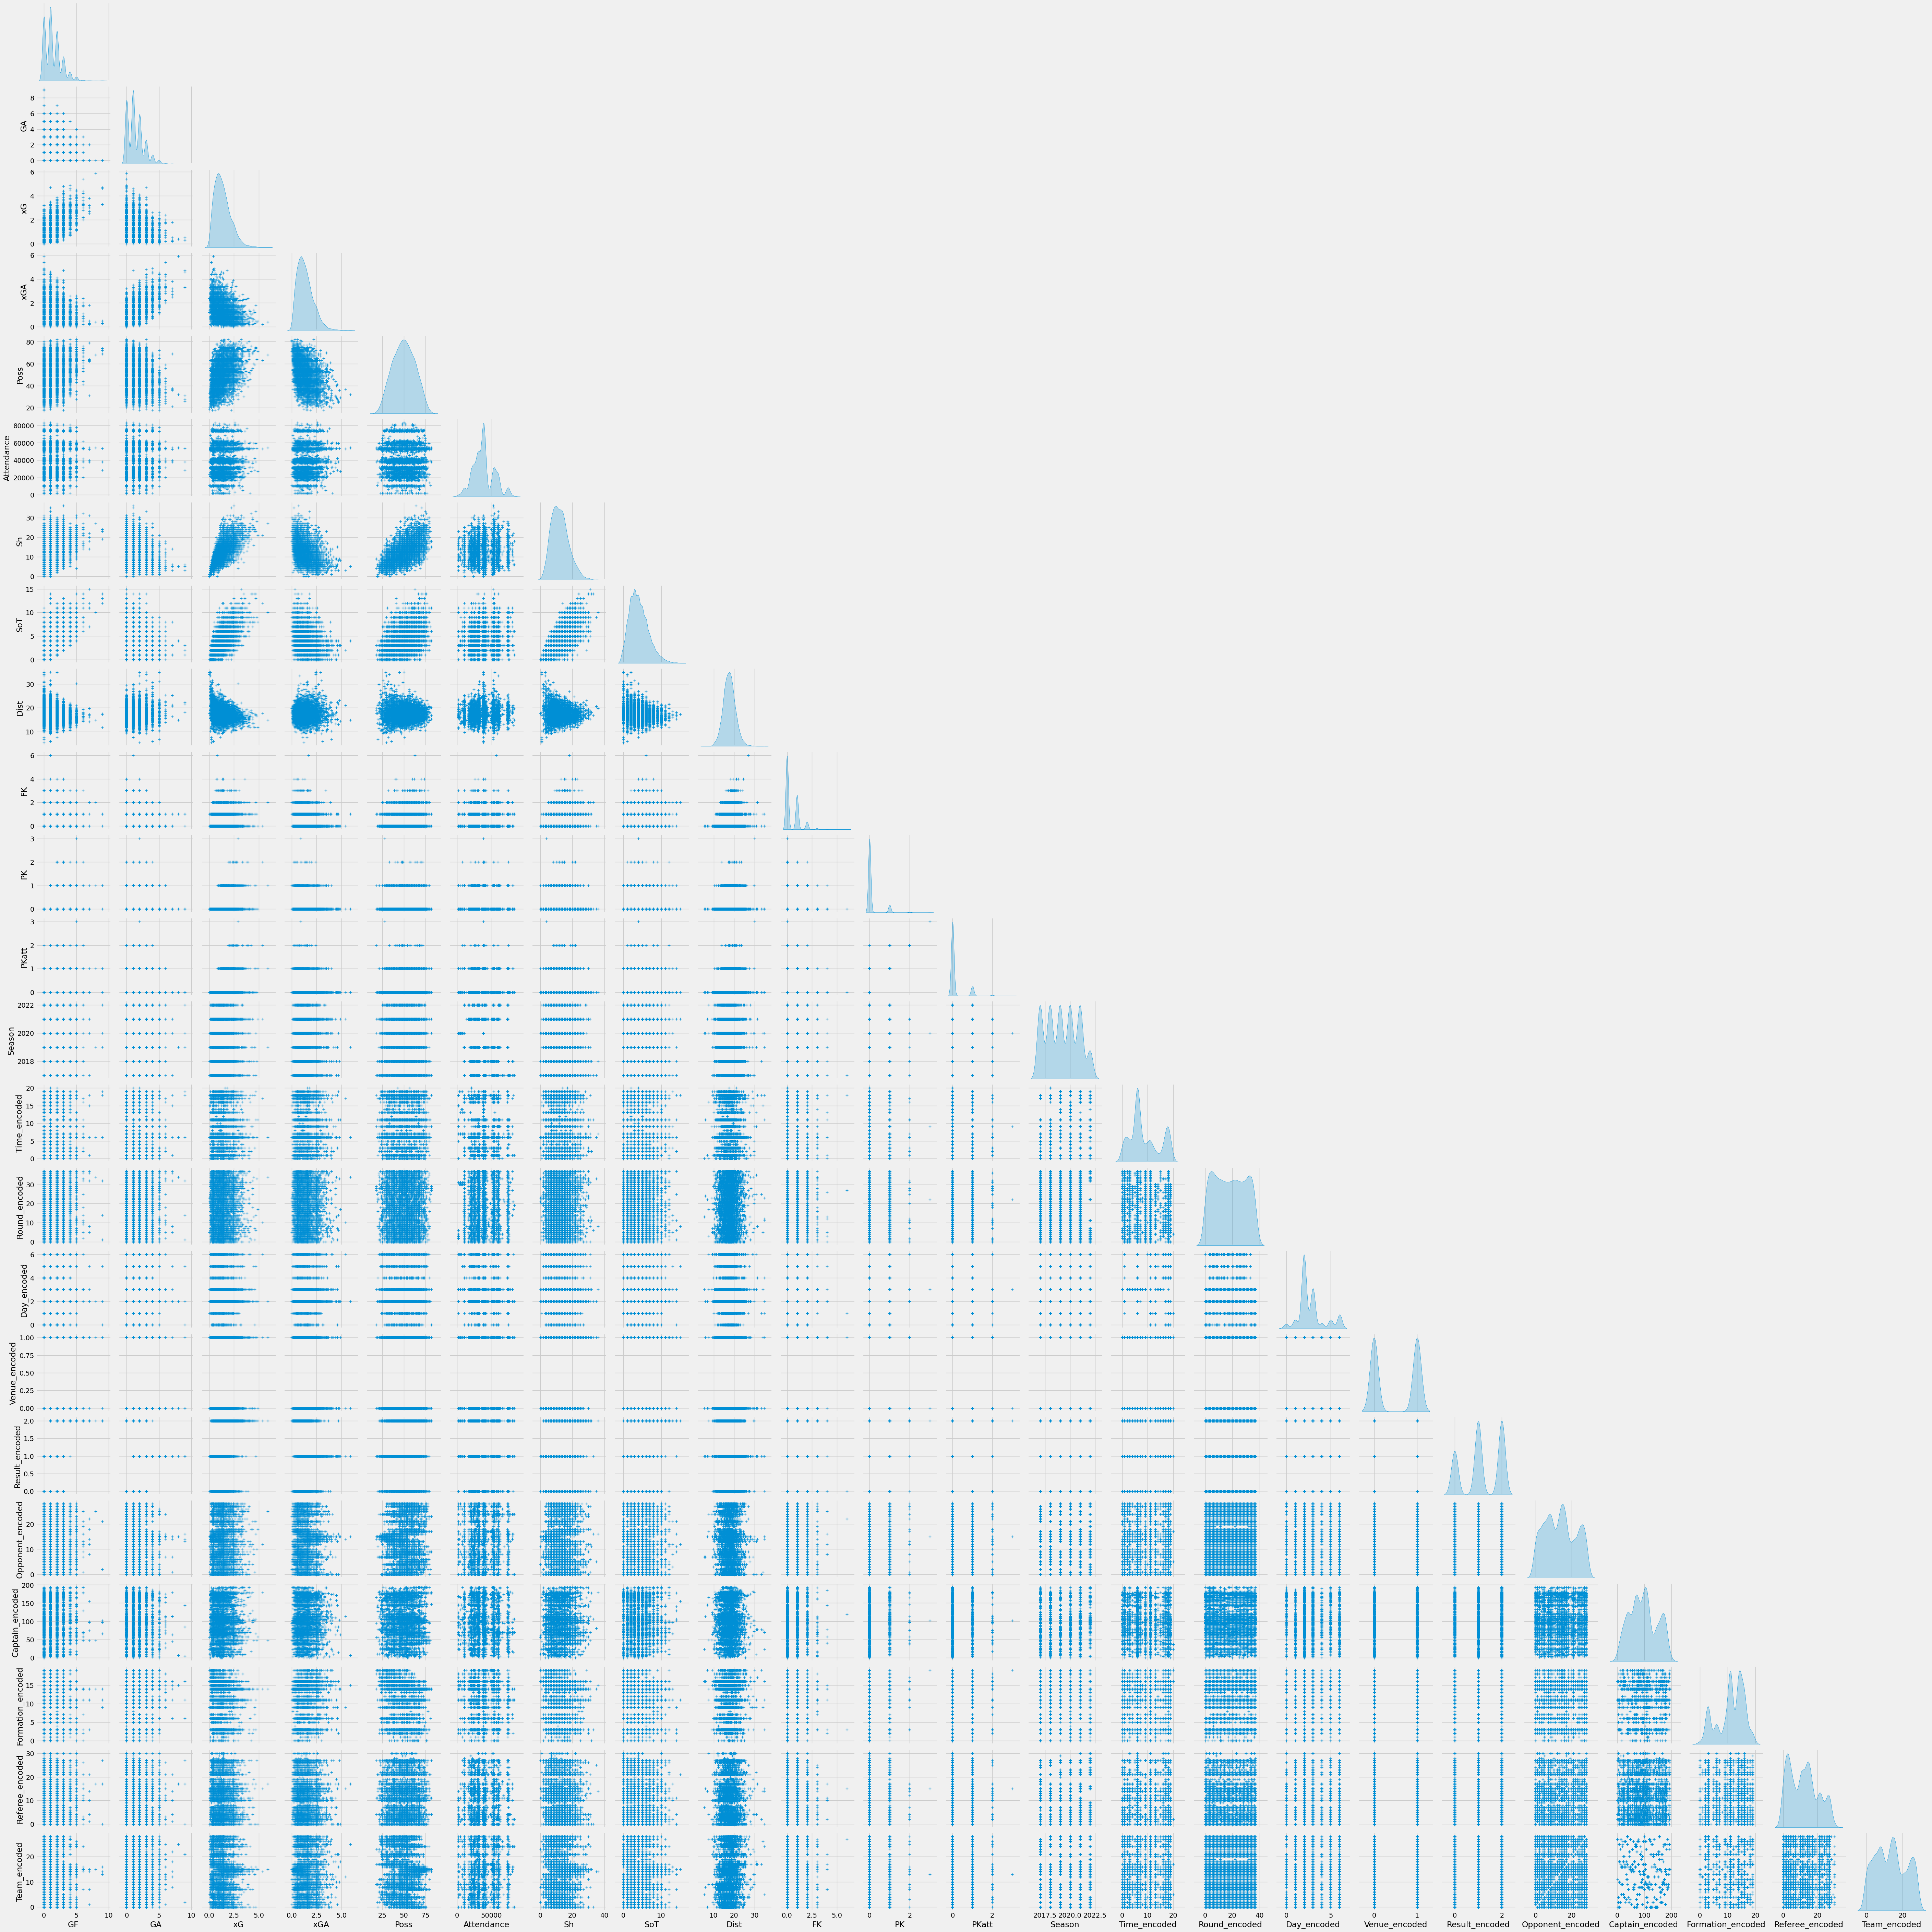

In [27]:
sns.pairplot(dfc, diag_kind = 'kde', corner = True, plot_kws = dict(marker = "+", linewidth = 1))

In [28]:
dfc.columns

Index(['Date', 'GF', 'GA', 'xG', 'xGA', 'Poss', 'Attendance', 'Sh', 'SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'Season', 'Time_encoded', 'Round_encoded',
       'Day_encoded', 'Venue_encoded', 'Result_encoded', 'Opponent_encoded',
       'Captain_encoded', 'Formation_encoded', 'Referee_encoded',
       'Team_encoded'],
      dtype='object')

In [29]:
X = dfc[['GA', 'Dist', 'PK', 'Season', 'Round_encoded', 'Opponent_encoded',
       'Formation_encoded', 'Referee_encoded', 'Team_encoded']]
print(X.columns)
y = dfc['Result_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Index(['GA', 'Dist', 'PK', 'Season', 'Round_encoded', 'Opponent_encoded',
       'Formation_encoded', 'Referee_encoded', 'Team_encoded'],
      dtype='object')


In [30]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = mlr.predict(X_test)

In [32]:
# {'D': 0, 'L': 1, 'W': 2}
mlr_diff = round(pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred}))
mlr_diff.head()

Actual value  Predicted value
599              2              1.0
752              2              2.0
2019             1              1.0
1001             0              1.0
3568             1              1.0

In [33]:
mae = round(metrics.mean_absolute_error(y_test, y_pred), 4)
print(f'MAE: {mae}')

mse = round(metrics.mean_squared_error(y_test, y_pred), 4)
print(f'MSE: {mse}')

rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4)
print(f'RMSE: {rmse}')

MAE: 0.6133
MSE: 0.5553
RMSE: 0.7452


## Decision tree classifier

In [34]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5567765567765568


## Adaboost classification